In [1]:
import numpy as np
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import rgb2gray
from sklearn.cluster import KMeans
from tqdm import tqdm

In [2]:
Xtr = pd.read_csv('data/Xtr.csv',header=None,sep=',',usecols=range(3072))
Xte = pd.read_csv('data/Xte.csv',header=None,sep=',',usecols=range(3072))
Ytr_ = pd.read_csv('data/Ytr.csv')#, index_col = None, header = None)

In [3]:
Xtr = np.array(Xtr).reshape(5000, 3,32, 32).swapaxes(1,2).swapaxes(2,3)
Xte = np.array(Xte).reshape(2000, 3,32, 32).swapaxes(1,2).swapaxes(2,3)
Ytr = np.array(Ytr_['Prediction'])

Xtr_ = rgb2gray(Xtr)
Xte_ = rgb2gray(Xte)

In [42]:
patch_size = 6

def whiten_patch(patch):
    x = patch.reshape(-1,1)
    print(x)
    D, E = np.linalg.eigh(x@x.T)
    D[-1] = 1/np.sqrt(D[-1])
    D = np.diag(D)
    x_w = E@D@E@x

    return x_w.reshape(6, 6)

def extract_patch(image, patch_size):
    corner = np.random.randint(32 - patch_size, size=2)
    i,j = corner[0], corner[1]
    patch = image[i:i+patch_size,j:j+patch_size]
    patch = (patch - np.mean(patch))
    if np.std(patch) > 0:
        patch/=np.std(patch)
    #patch = whiten_patch(patch)
    return patch


def extract_patches(dataset, num_patches, patch_size):
    patches = np.zeros((num_patches, patch_size, patch_size))
    for i in tqdm(range(num_patches)):
        n=len(dataset)
        idx = np.random.randint(n)
        patch = extract_patch(dataset[idx], patch_size)
        patches[i] = patch
    return patches

def cluster_patches(patches, k):
    n = len(patches)
    data = patches.reshape(n,-1)
    clust = KMeans(n_clusters=k)
    clust.fit(data)
    return clust.labels_, clust.cluster_centers_

def compute_features_patch(patch, centroids):
    k = len(centroids)
    z = np.zeros(k)
    for i, centroid in enumerate(centroids):
        z[i] = np.linalg.norm(patch.reshape(-1) - centroid)
    f =  np.maximum(np.zeros(k), np.mean(z)*np.ones(k) - z)
    return f

In [43]:
def compute_features(imgs, centroids):
    for img in imgs:
        for i in range(img_size - patch_size):
            for j in range(img_size - patch_size):
                patch = Xtr_[0][:6, :6]
compute_features(patch, centroids)

array([4.24868886e-01, 1.40284350e-01, 2.29803105e-01, 2.41190026e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.23898902e-01,
       0.00000000e+00, 0.00000000e+00, 1.12092248e-01, 1.38820835e-01,
       0.00000000e+00, 0.00000000e+00, 2.48284122e-01, 0.00000000e+00,
       2.13685256e-01, 0.00000000e+00, 3.72377324e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.06683094e-02, 3.45362252e-02, 1.62067182e-01,
       0.00000000e+00, 1.01952237e-01, 7.07206852e-02, 0.00000000e+00,
       1.82763809e-01, 1.72705035e-01, 0.00000000e+00, 0.00000000e+00,
       1.24227471e-01, 1.09622923e-01, 0.00000000e+00, 4.77109845e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61814421e-01, 1.43618501e-01, 8.13876939e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.53589166e-02, 0.00000000e+00, 0.00000000e+00, 2.16154661e-01,
      

In [9]:
patches = extract_patches(Xtr_, 200000, 6)

100%|████████████████████████████████| 200000/200000 [00:12<00:00, 16163.10it/s]


In [10]:
labels, centroids = cluster_patches(patches, 400)

KeyboardInterrupt: 

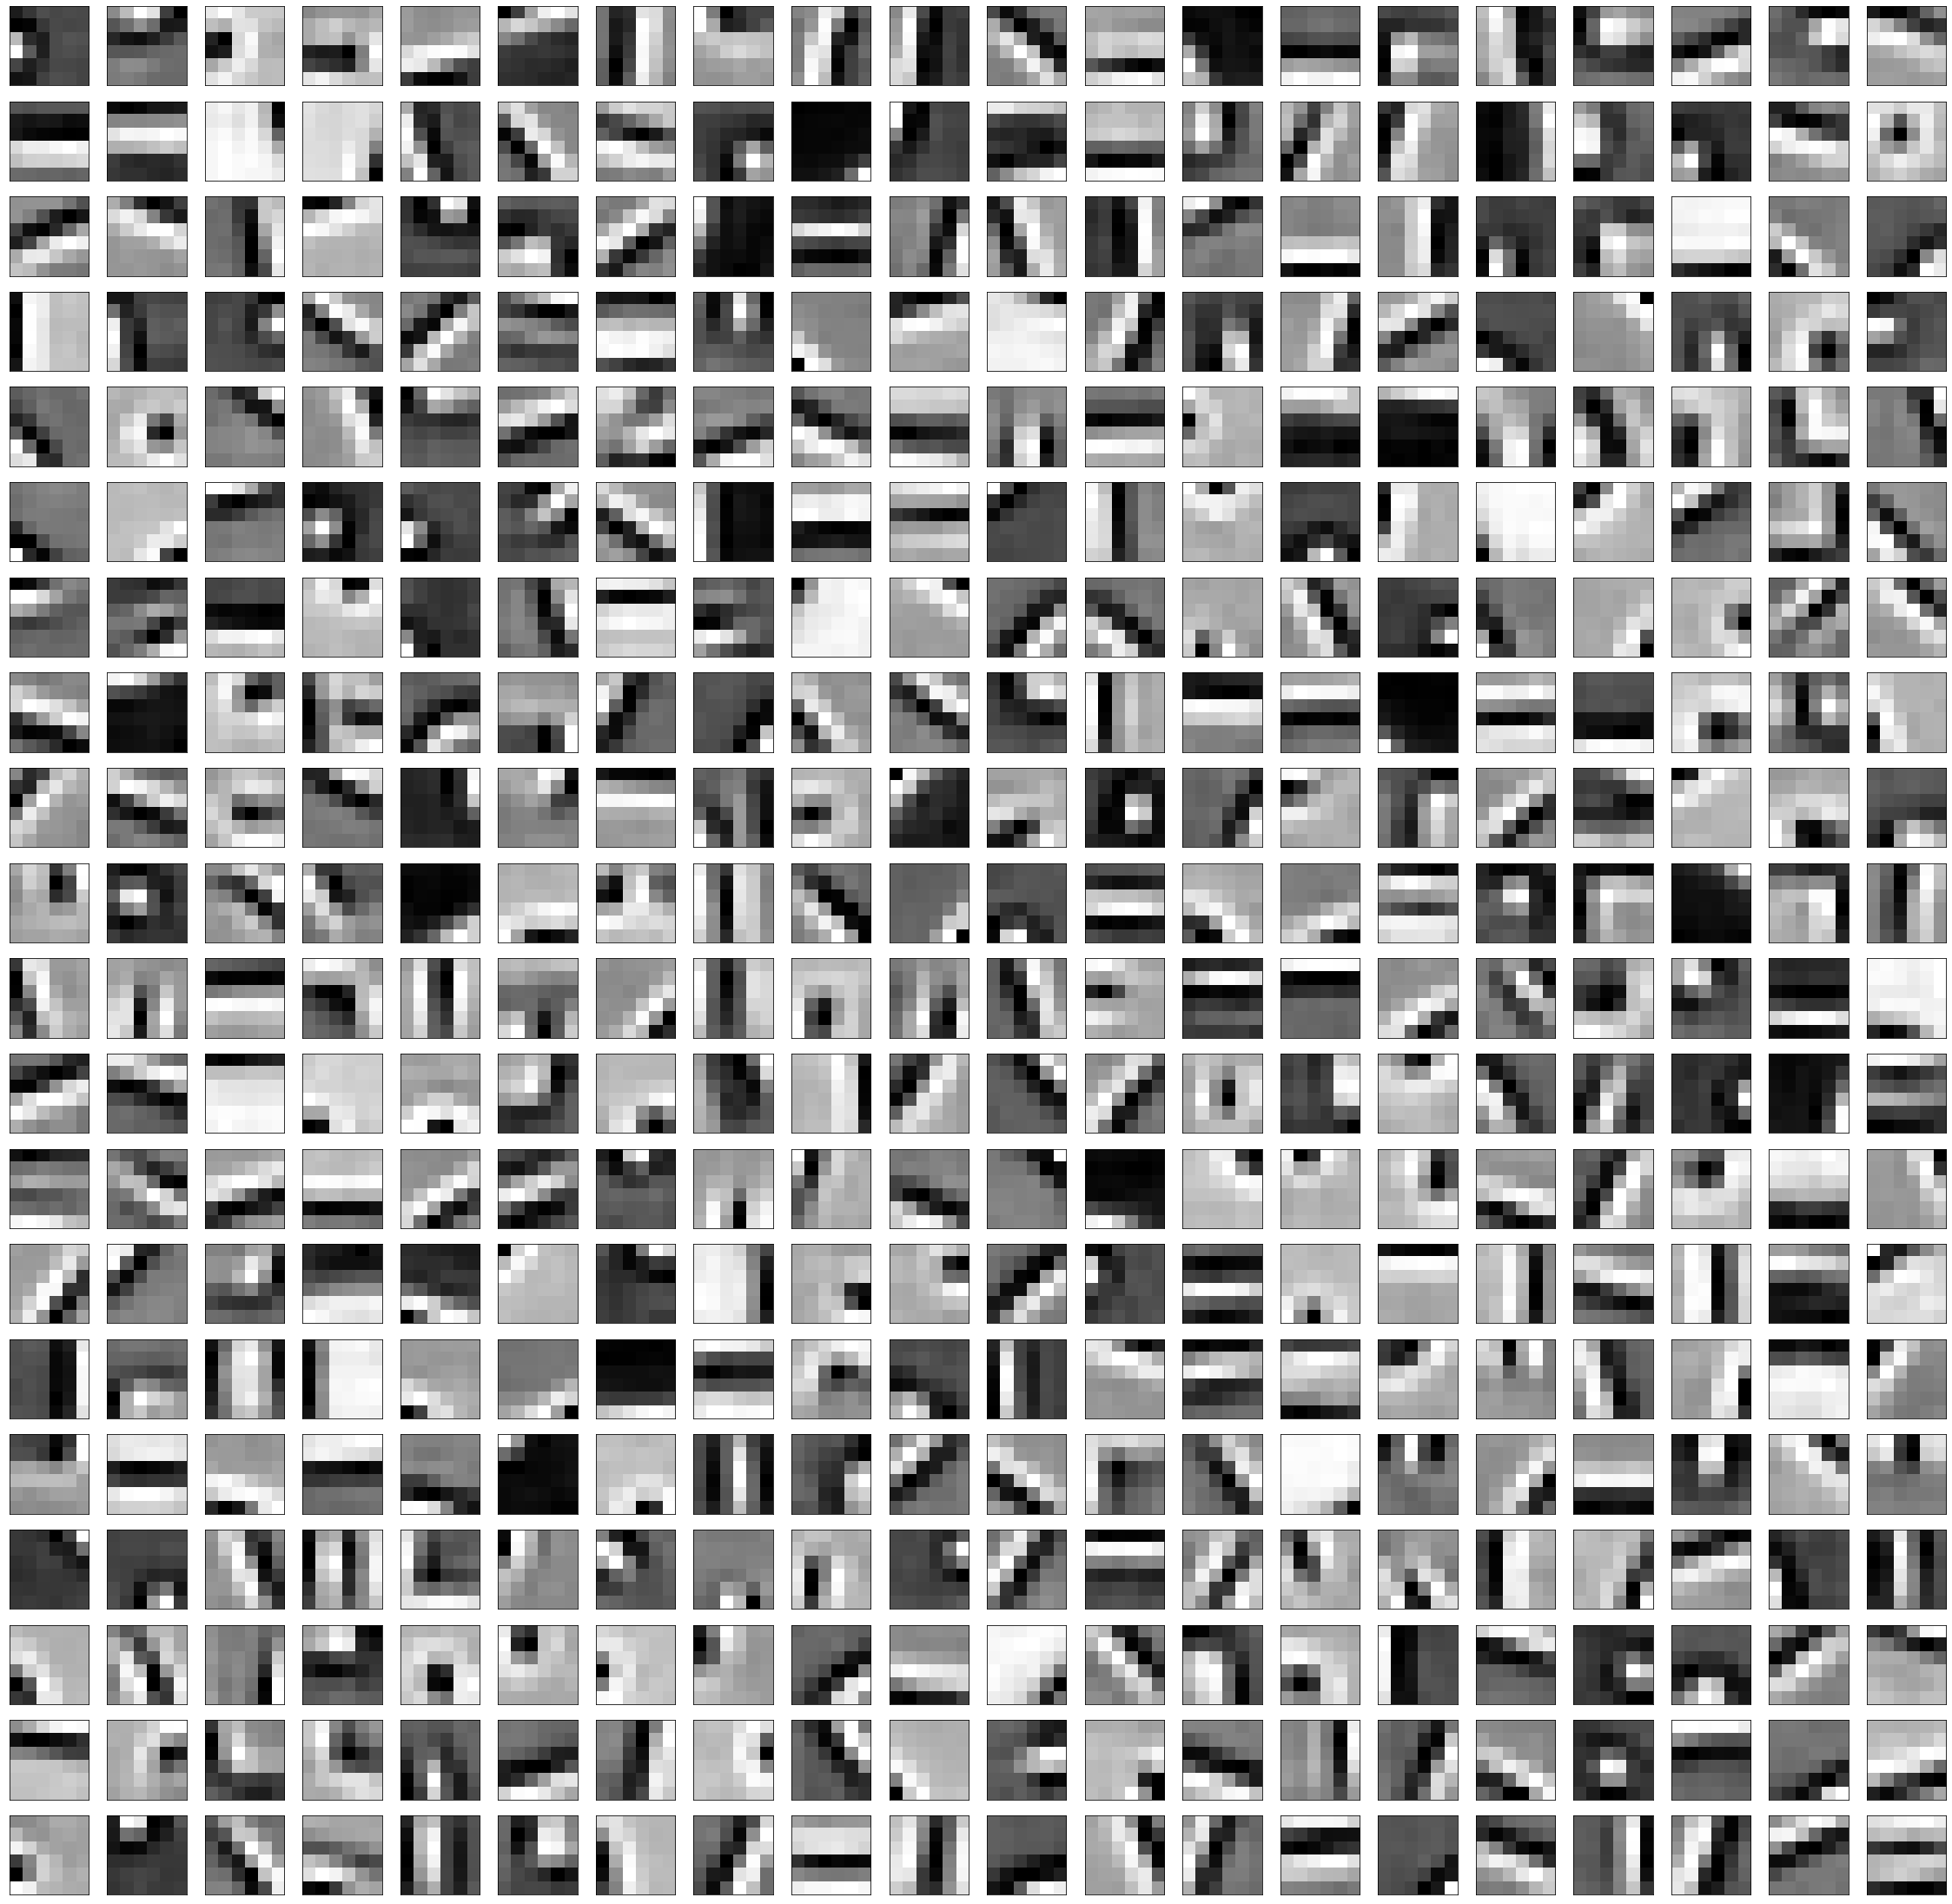

In [7]:
fig, ax = plt.subplots(20,20, figsize = (40,40))
idx = 0
for i in range(20):
    for j in range(20):
        ax[i,j].imshow(centroids[idx].reshape(6, 6), cmap='gray')
        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].axes.yaxis.set_visible(False)
        idx+=1